### Build a heatmap over the allocation of the reciprocal best Hit BLAST results groupt by their organisms' genus

The reciprocal Best Hit BLAST results have to be converted from the html to a csv in a first step. 

The heatmap is created according to all accesion ids in the acc_id file. 

The names for the corresponding cluster have to be given as input argument (type: list of strings), in the same order as the accesion ids. If this list is not given, the accesion ids will be given as names on the heatmap.

##### TODOs 


- get a better heatmap (colors even with a few high values?
- create sub- heatmap with only using xx sequences of the results 
- how to create namelist - combining with WP? 
- add further geni, that are not given by the current clusters?


In [1]:
import pandas as pd
import numpy as np

##for plotting:
import matplotlib as mlp
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

%matplotlib inline

In [2]:
'''
Function takes an input dataframe given through the reciprocal BLAST.
The genus for the corresponding protein(given through its WP) is filterd out and stored in a list.
The function returns a list of the genus of all organisms that realign best to the given protein number. 
input arguments: BLAST_output dataframe (type:dataframe, csv read in with pandas), WP_number to best realign to (type_string)
'''
def extract_genuslist(df, WP_num):
    genuslist= []
    for i in range(len(df)):
        if df.qseqid [i] == WP_num:
            genuslist.append(df.sscinames[i].split(' ')[0])
       
    print('Entries in genuslist for', WP_num, ':', len(genuslist))
    return(genuslist)

In [3]:
'''
The function takes the genuslist and counts the occurence of each genus in the list.
Its outputs the number of occurences per genus in a dataframe.
Input arguments: list with all the geni of the organisms owning the protein(type: list) and the proteinname (type: string)
'''

def count_copies (genlist, protname):
    gendict = {x:genlist.count(x) for x in genlist}
    d =pd.DataFrame.from_dict(gendict,orient='index')
    d.columns = [protname]
    d.index.name = 'genus'
    d.reset_index(inplace=True)
    print('number of geni:', len(d))
    return(d)

In [4]:
'''
The function creates a dataframe with the genus in the first column and the occurence in the different 
protein clusters in the following columns, where each protein cluster has an own column and the amount 
of occurences per genus is measured. 

Inputs: df of accesion ids (first column), the BLAST result csv, optional: a list of strings of the protein names. 
The list must have the same length as the accesion id dataframe and names and ids must be ordered in the same order

'''
def get_dataframe(acc_ids, workingcsv, namelist = None):

    num_acc_ids = len(acc_ids)
    
    df_prot = count_copies(extract_genuslist(workingcsv,acc_ids.iloc[0,0]),( namelist[0] if namelist else acc_ids.iloc[0,0]))
    
    
    if num_acc_ids > 1: 
    
        for i in range(1,num_acc_ids):
        
            df = count_copies(extract_genuslist(workingcsv,acc_ids.iloc[i,0]),( namelist[i] if namelist else acc_ids.iloc[i,0]))
    
            df_prot = pd.merge(df_prot, df, how='outer')
        
        
    df_prot = df_prot.drop_duplicates()
    df_prot = df_prot.fillna(0)   
    
    return(df_prot)

In [7]:
'''
Short function combining the functions above. 
Function takes the BLAST_data (Accession ID list (txt document) and BLAST result csv to read them in and creates a dataframe 
of the amount of occurence for all given protein clusters per genome. Only genomes that occur at least one at one protein cluster
are taken into consioderation)
'''
def preparing_heatmap(Acc_id_name, Resultcsv, namelist = None):
    
    acc_ids = pd.read_csv(Acc_id_name, header=None)
    workingcsv = pd.read_csv(Resultcsv)
    
    frame= get_dataframe(acc_ids, workingcsv, namelist = namelist)
    
    dat = frame[namelist if namelist else acc_ids[0].tolist()]
    dat.index= list(frame['genus'])
    
    print('Dataframe with shape', dat.shape, 'has been successfully created')
    return(dat)

In [8]:
protnames=['BcsA1','XcsB2','BcsA2','XcsA','XcsB','XcsC','AcrA','AcrB','SFT','ABC1','ABC2','GTF1','GTF2','HlyD','peptidase','LptFG','LptB','LptA','LPS','LptC','LptD','FtsX','HlyD2','ABC3','HlyD3','PteB','RND1','RND2','TolC','MlaE','permease','S-layer','ABC4','ABC5','ABC6','TPR','RND3','export']

In [9]:
frame = preparing_heatmap('acc_ids.txt','BLAST_results.csv')

Entries in genuslist for WP_011378340 : 103
number of geni: 24
Entries in genuslist for WP_011378341 : 18
number of geni: 6
Entries in genuslist for WP_011243364 : 148
number of geni: 43
Entries in genuslist for WP_011242471 : 32
number of geni: 14
Entries in genuslist for WP_039755718 : 41
number of geni: 17
Entries in genuslist for WP_011378019 : 80
number of geni: 28
Entries in genuslist for WP_011244046 : 334
number of geni: 52
Entries in genuslist for WP_011378431 : 563
number of geni: 54
Entries in genuslist for WP_011244513 : 179
number of geni: 47
Entries in genuslist for WP_011378231 : 243
number of geni: 51
Entries in genuslist for WP_011378232 : 123
number of geni: 45
Entries in genuslist for WP_011378235 : 118
number of geni: 38
Entries in genuslist for WP_011244503 : 111
number of geni: 36
Entries in genuslist for WP_011244501 : 602
number of geni: 55
Entries in genuslist for WP_011378236 : 810
number of geni: 54
Entries in genuslist for WP_011243320 : 256
number of geni: 

In [59]:
frame.shape

(60, 38)

In [60]:
frame

,WP_011378340,WP_011378341,WP_011243364,WP_011242471,WP_039755718,WP_011378019,WP_011244046,WP_011378431,WP_011244513,WP_011378231,...,WP_011378177,WP_011243448,WP_011243394,WP_011243386,WP_011243384,WP_011243359,WP_011377610,WP_011377614,WP_011377621,WP_011377674
Nostoc,20.0,1.0,10.0,4.0,7.0,15.0,46.0,96.0,23.0,53.0,...,44.0,38.0,23.0,214.0,32.0,62.0,61.0,65.0,63.0,0.0
Calothrix,16.0,2.0,11.0,1.0,3.0,7.0,23.0,34.0,9.0,9.0,...,19.0,18.0,9.0,100.0,11.0,26.0,25.0,32.0,24.0,0.0
Synechococcus,18.0,7.0,48.0,11.0,10.0,7.0,108.0,164.0,62.0,58.0,...,128.0,60.0,63.0,39.0,22.0,69.0,72.0,75.0,67.0,1.0
Leptolyngbya,8.0,0.0,5.0,0.0,1.0,4.0,6.0,17.0,4.0,10.0,...,7.0,7.0,6.0,26.0,11.0,13.0,13.0,14.0,14.0,0.0
Anabaena,1.0,0.0,2.0,0.0,0.0,0.0,4.0,6.0,3.0,3.0,...,6.0,5.0,2.0,20.0,3.0,6.0,8.0,6.0,6.0,0.0
Thermosynechococcus,11.0,6.0,9.0,6.0,6.0,6.0,5.0,6.0,0.0,6.0,...,11.0,6.0,6.0,6.0,6.0,12.0,11.0,16.0,6.0,0.0
Oxynema,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,...,2.0,1.0,1.0,10.0,0.0,2.0,2.0,3.0,1.0,0.0
Scytonema,2.0,0.0,3.0,1.0,2.0,4.0,10.0,17.0,2.0,4.0,...,2.0,2.0,2.0,17.0,2.0,6.0,7.0,10.0,9.0,0.0
Tolypothrix,1.0,0.0,2.0,0.0,0.0,2.0,6.0,12.0,2.0,5.0,...,4.0,4.0,2.0,20.0,3.0,6.0,6.0,9.0,4.0,0.0
[Phormidium],1.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,0.0,1.0,...,2.0,0.0,1.0,8.0,1.0,2.0,2.0,2.0,1.0,0.0


In [61]:
frame_01 = preparing_heatmap('acc_ids.txt','BLAST_results.csv', namelist = protnames)

Entries in genuslist for WP_011378340 : 103
number of geni: 24
Entries in genuslist for WP_011378341 : 18
number of geni: 6
Entries in genuslist for WP_011243364 : 148
number of geni: 43
Entries in genuslist for WP_011242471 : 32
number of geni: 14
Entries in genuslist for WP_039755718 : 41
number of geni: 17
Entries in genuslist for WP_011378019 : 80
number of geni: 28
Entries in genuslist for WP_011244046 : 334
number of geni: 52
Entries in genuslist for WP_011378431 : 563
number of geni: 54
Entries in genuslist for WP_011244513 : 179
number of geni: 47
Entries in genuslist for WP_011378231 : 243
number of geni: 51
Entries in genuslist for WP_011378232 : 123
number of geni: 45
Entries in genuslist for WP_011378235 : 118
number of geni: 38
Entries in genuslist for WP_011244503 : 111
number of geni: 36
Entries in genuslist for WP_011244501 : 602
number of geni: 55
Entries in genuslist for WP_011378236 : 810
number of geni: 54
Entries in genuslist for WP_011243320 : 256
number of geni: 

In [62]:
frame_01.shape

(60, 38)

In [63]:
frame_01

,BcsA1,XcsB2,BcsA2,XcsA,XcsB,XcsC,AcrA,AcrB,SFT,ABC1,...,TolC,MlaE,permease,S-layer,ABC4,ABC5,ABC6,TPR,RND3,export
Nostoc,20.0,1.0,10.0,4.0,7.0,15.0,46.0,96.0,23.0,53.0,...,44.0,38.0,23.0,214.0,32.0,62.0,61.0,65.0,63.0,0.0
Calothrix,16.0,2.0,11.0,1.0,3.0,7.0,23.0,34.0,9.0,9.0,...,19.0,18.0,9.0,100.0,11.0,26.0,25.0,32.0,24.0,0.0
Synechococcus,18.0,7.0,48.0,11.0,10.0,7.0,108.0,164.0,62.0,58.0,...,128.0,60.0,63.0,39.0,22.0,69.0,72.0,75.0,67.0,1.0
Leptolyngbya,8.0,0.0,5.0,0.0,1.0,4.0,6.0,17.0,4.0,10.0,...,7.0,7.0,6.0,26.0,11.0,13.0,13.0,14.0,14.0,0.0
Anabaena,1.0,0.0,2.0,0.0,0.0,0.0,4.0,6.0,3.0,3.0,...,6.0,5.0,2.0,20.0,3.0,6.0,8.0,6.0,6.0,0.0
Thermosynechococcus,11.0,6.0,9.0,6.0,6.0,6.0,5.0,6.0,0.0,6.0,...,11.0,6.0,6.0,6.0,6.0,12.0,11.0,16.0,6.0,0.0
Oxynema,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,...,2.0,1.0,1.0,10.0,0.0,2.0,2.0,3.0,1.0,0.0
Scytonema,2.0,0.0,3.0,1.0,2.0,4.0,10.0,17.0,2.0,4.0,...,2.0,2.0,2.0,17.0,2.0,6.0,7.0,10.0,9.0,0.0
Tolypothrix,1.0,0.0,2.0,0.0,0.0,2.0,6.0,12.0,2.0,5.0,...,4.0,4.0,2.0,20.0,3.0,6.0,6.0,9.0,4.0,0.0
[Phormidium],1.0,0.0,1.0,0.0,0.0,3.0,2.0,1.0,0.0,1.0,...,2.0,0.0,1.0,8.0,1.0,2.0,2.0,2.0,1.0,0.0


In [60]:
'''
short function that crates a sub-dataframe from the overall-results-datadrame. 
Input: the results dataframe created with the function preparing_heatmap
        a list of strings containing the Protein Ids or names(if argument namelist given in preparing heatmap) 
            of the proteins needed in the sub-dataframe
'''
def create_subframes(df,columnnames):
    
    newframe= df[columnnames]
    
    return newframe

In [61]:
SubA = create_subframes(frame, ['WP_011378340','WP_011243364','WP_011242471'])
SubA

,WP_011378340,WP_011243364,WP_011242471
Nostoc,20.0,10.0,4.0
Calothrix,16.0,11.0,1.0
Synechococcus,18.0,48.0,11.0
Leptolyngbya,8.0,5.0,0.0
Anabaena,1.0,2.0,0.0
Thermosynechococcus,11.0,9.0,6.0
Oxynema,1.0,1.0,0.0
Scytonema,2.0,3.0,1.0
Tolypothrix,1.0,2.0,0.0
[Phormidium],1.0,1.0,0.0


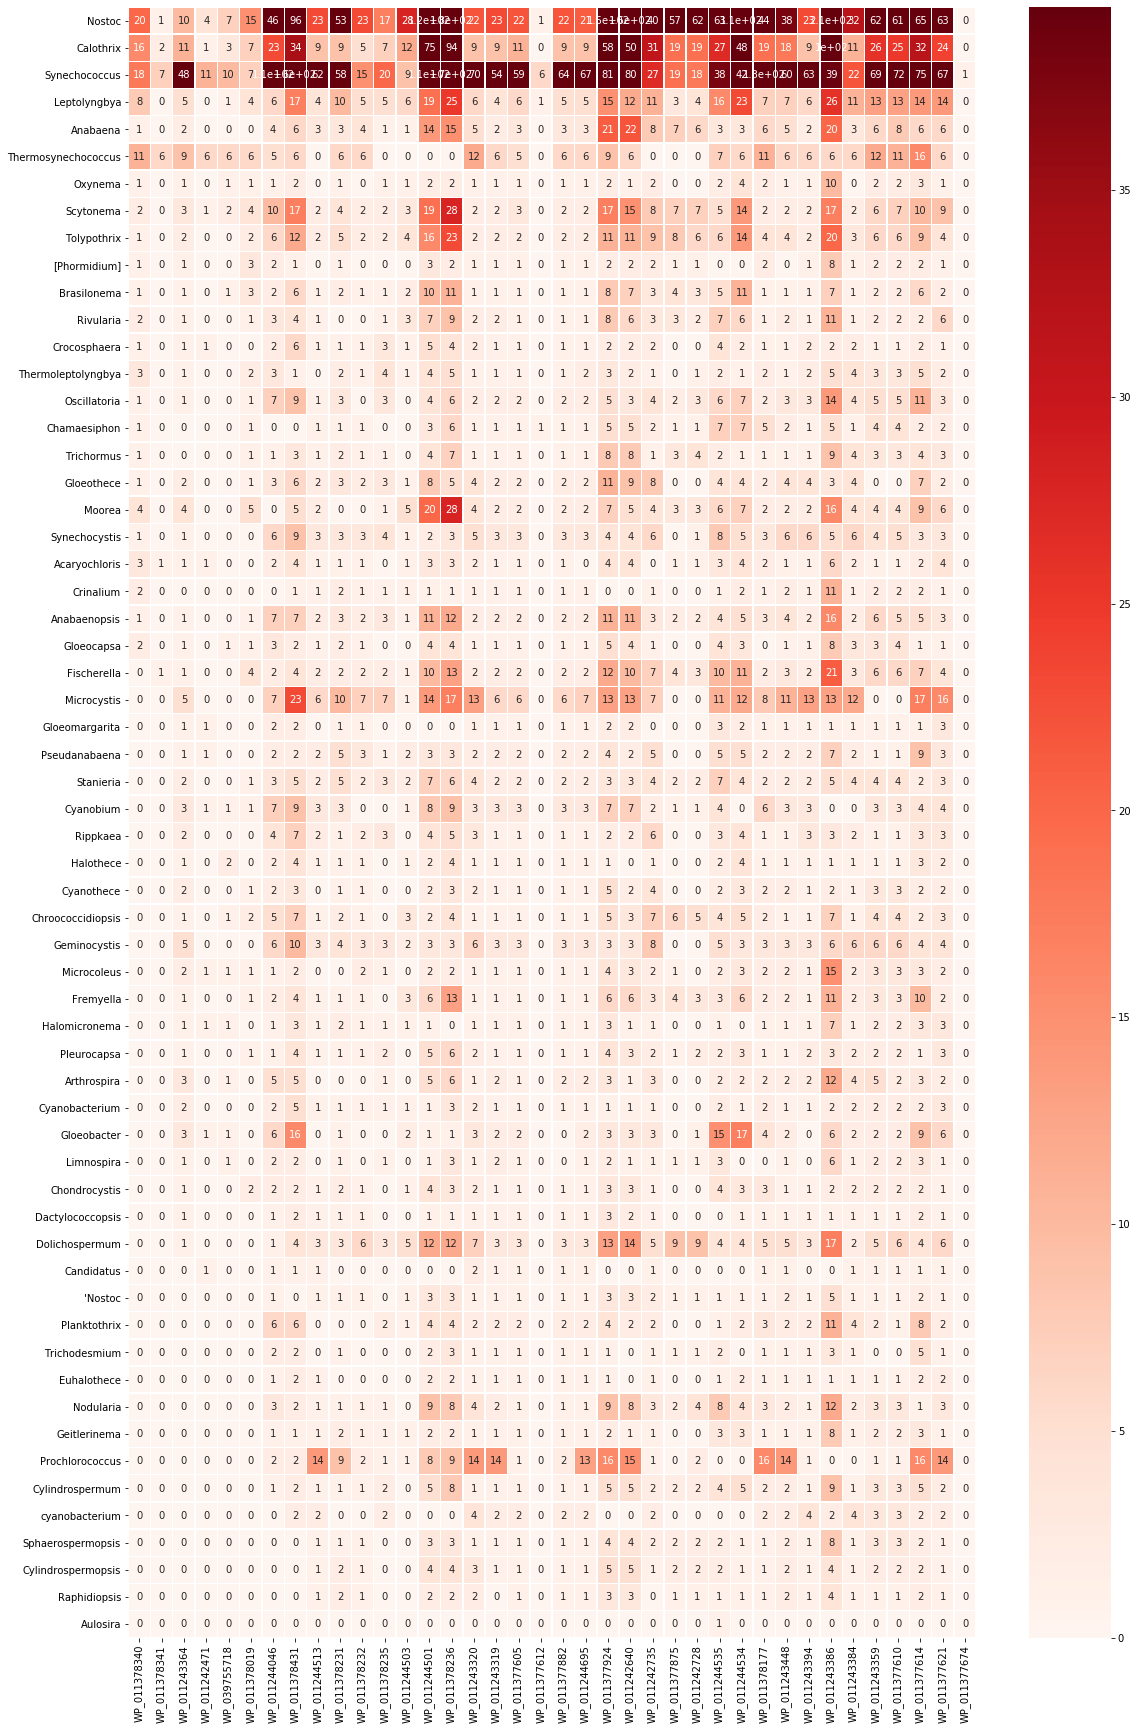

In [19]:
f = plt.figure(figsize=(19,30.0))
sns.heatmap(frame, cmap='Reds', linewidths=0.5, annot=True, robust = True)

#plt.savefig('Heatmap_new.pdf')

60

In [97]:
'''
function to create a heatmap, given the dataframe created with the function preparing_heatmap or create_subframes.

Addicitonal Input arguments: saving: string of the name the saved figure should have.(eg 'heatmap.pdf'). 
                                 If a name is given, the figure will be saved
                             log: is true, a logarithmic scale is chosen for the heatmap. 
                                 If False, the linear scale is chosen
'''
def create_heatmap(df, saving = None, log = True):
    
    
    
    frameshape = df.shape
    
    f = plt.figure(figsize=(frameshape[1]/2+6,frameshape[0]/2))

    plots = gridspec.GridSpec(1, 3, wspace=0.05, hspace=0.1,
                              width_ratios=[frameshape[1]/2, 4, frameshape[1]/20])


    syn_heat = f.add_subplot(plots[0,0])
    
    # Remove the tick marks and place labels at top, bottom, and right  
    syn_heat.tick_params(axis="both", which="both", bottom= False, top=False,
                    left=False, right=False, labeltop=False, labelbottom="on", 
                    labelleft=False, labelright="on")

    syn_heat.set_xticks(np.arange(frameshape[1])+0.5, minor=False)
    syn_heat.set_yticks(np.arange(frameshape[0])+0.5, minor=False)
    
    # Add x-axis labels
    syn_heat.set_xticklabels(df.columns, fontsize=20, rotation=90)
     
    syn_heat.set_yticklabels(df.index, fontsize=20)
   
    heat_syn = plt.pcolor(df,cmap= "Reds", norm=mlp.colors.LogNorm ()if log else None)


    bar_heat = f.add_subplot(plots[0,2])
    cbar = plt.colorbar(heat_syn, bar_heat )
    cbar.ax.tick_params(length=10, width=5)
    cbar.ax.tick_params(labelsize=20)
    #cbar.ax.set_yticklabels(fontsize=20)
    cbar.set_label('Protein abundance', fontsize=30)
    
    
    
    if saving : 
        plt.savefig(saving)

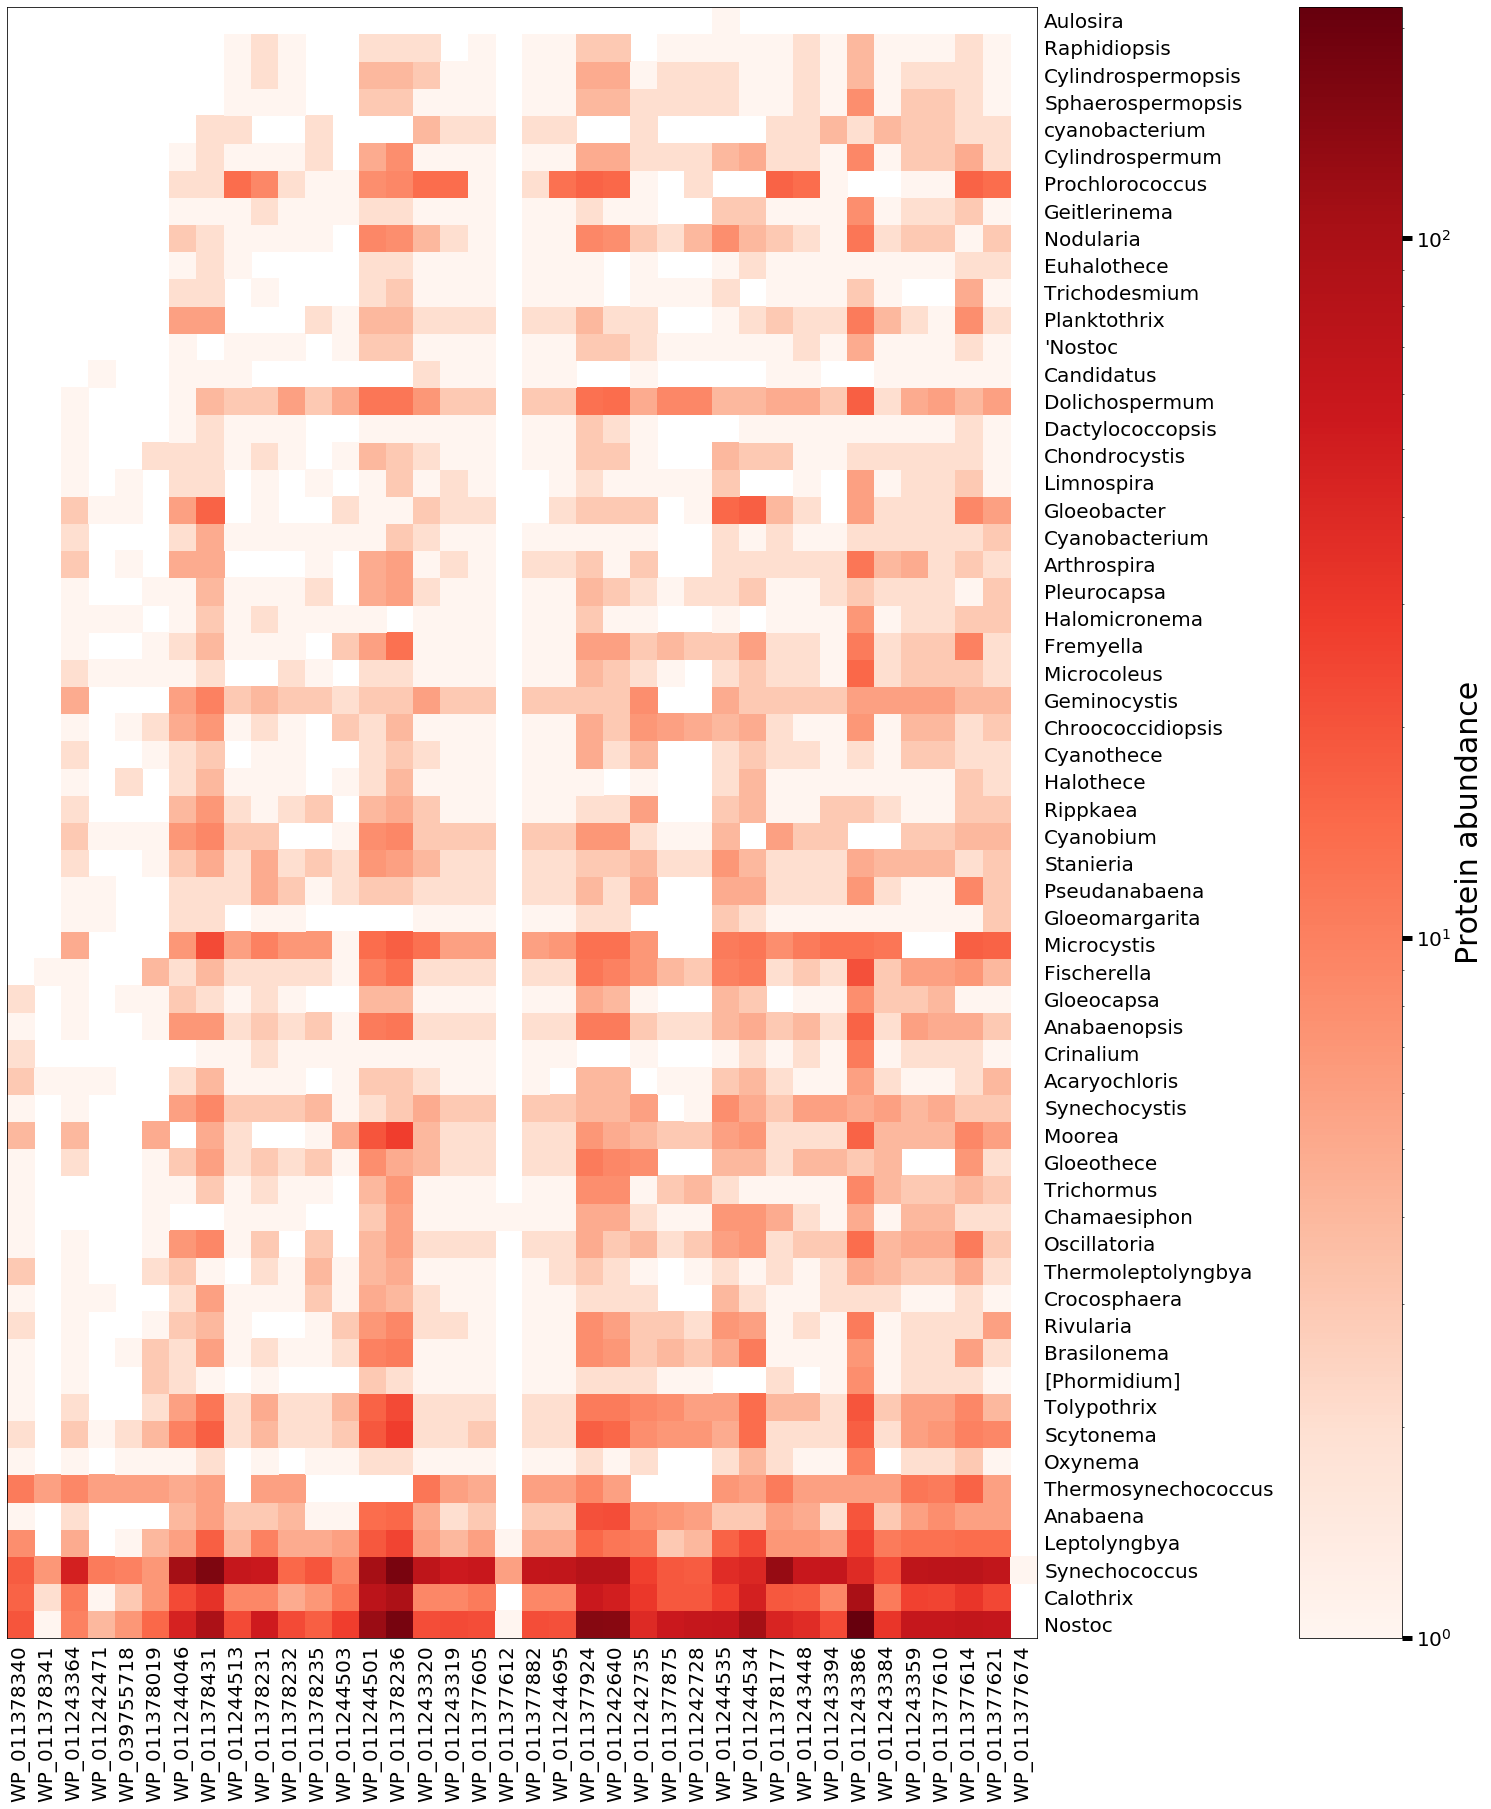

In [99]:
create_heatmap(frame)

In [102]:
listofframes=[frame,SubA]

In [100]:
frame.shape

(60, 38)

In [122]:
'''
function to create a heatmap, given a lsi of dataframes created with the function preparing_heatmap or create_subframes.

Addicitonal Input arguments: saving: string of the name the saved figure should have.(eg 'heatmap.pdf'). 
                                 If a name is given, the figure will be saved
                             log: is true, a logarithmic scale is chosen for the heatmap. 
                                 If False, the linear scale is chosen
'''
def create_heatmap_from_list(dflist, saving = None, log = True):
    
    numframes= len(dflist)
    
    height = []
    width =[]
    maxval = []
    for i in range(numframes):
        height.append (listofframes[i].shape[0]/2)
        height.append (0.5)   
        width.append(listofframes[i].shape[1]/2)
        width.append(0.5)
        maxval.append(listofframes[i].max().max())
        
    
    width.append(3)    
    width.append(1) 
    sumheight= sum(height)
    sumwidth = sum(width) 
    
    max_value = max(maxval)
    
    print(height, width)
    
    f = plt.figure(figsize=(sumwidth+1,sumheight))

    plots = gridspec.GridSpec(1, numframes*2+2, wspace=0.05, hspace=0.1, width_ratios=width)

    for i in range(numframes):
        syn_heat = f.add_subplot(plots[0,i*2])
        frame = dflist[i]
        # Remove the tick marks and place labels at top, bottom, and right  
        if i == numframes-1:
            syn_heat.tick_params(axis="both", which="both", bottom= False, top=False,
                    left=False, right=False, labeltop=False, labelbottom="on", 
                    labelleft=False, labelright="on")
                 
            syn_heat.set_xticks(np.arange(frame.shape[1])+0.5, minor=False)
            syn_heat.set_yticks(np.arange(frame.shape[0])+0.5, minor=False)
                 
            syn_heat.set_xticklabels(frame.columns, fontsize=20, rotation=90)
            syn_heat.set_yticklabels(frame.index, fontsize=20)
   
                 
        else: 
            syn_heat.tick_params(axis="both", which="both", bottom= False, top=False,
                    left=False, right=False, labeltop=False, labelbottom="on", 
                    labelleft=False, labelright=False)     

            syn_heat.set_xticks(np.arange(frame.shape[1])+0.5, minor=False)
            #syn_heat.set_yticks(np.arange(frame.shape[0])+0.5, minor=False)
    

            syn_heat.set_xticklabels(frame.columns, fontsize=20, rotation=90)
            #syn_heat.set_yticklabels(df.index, fontsize=20)
   
        heat_syn = plt.pcolor(frame,cmap= "Reds",vmax= max_value ,norm=mlp.colors.LogNorm ()if log else None)


    bar_heat = f.add_subplot(plots[0,-1])
    cbar = plt.colorbar(heat_syn, bar_heat )
    cbar.ax.tick_params(length=10, width=5)
    cbar.ax.tick_params(labelsize=20)
    #cbar.ax.set_yticklabels(fontsize=20)
    cbar.set_label('Protein abundance', fontsize=30)
    
    
    
    if saving : 
        plt.savefig(saving)

[30.0, 0.5, 30.0, 0.5] [19.0, 0.5, 1.5, 0.5, 3, 1]


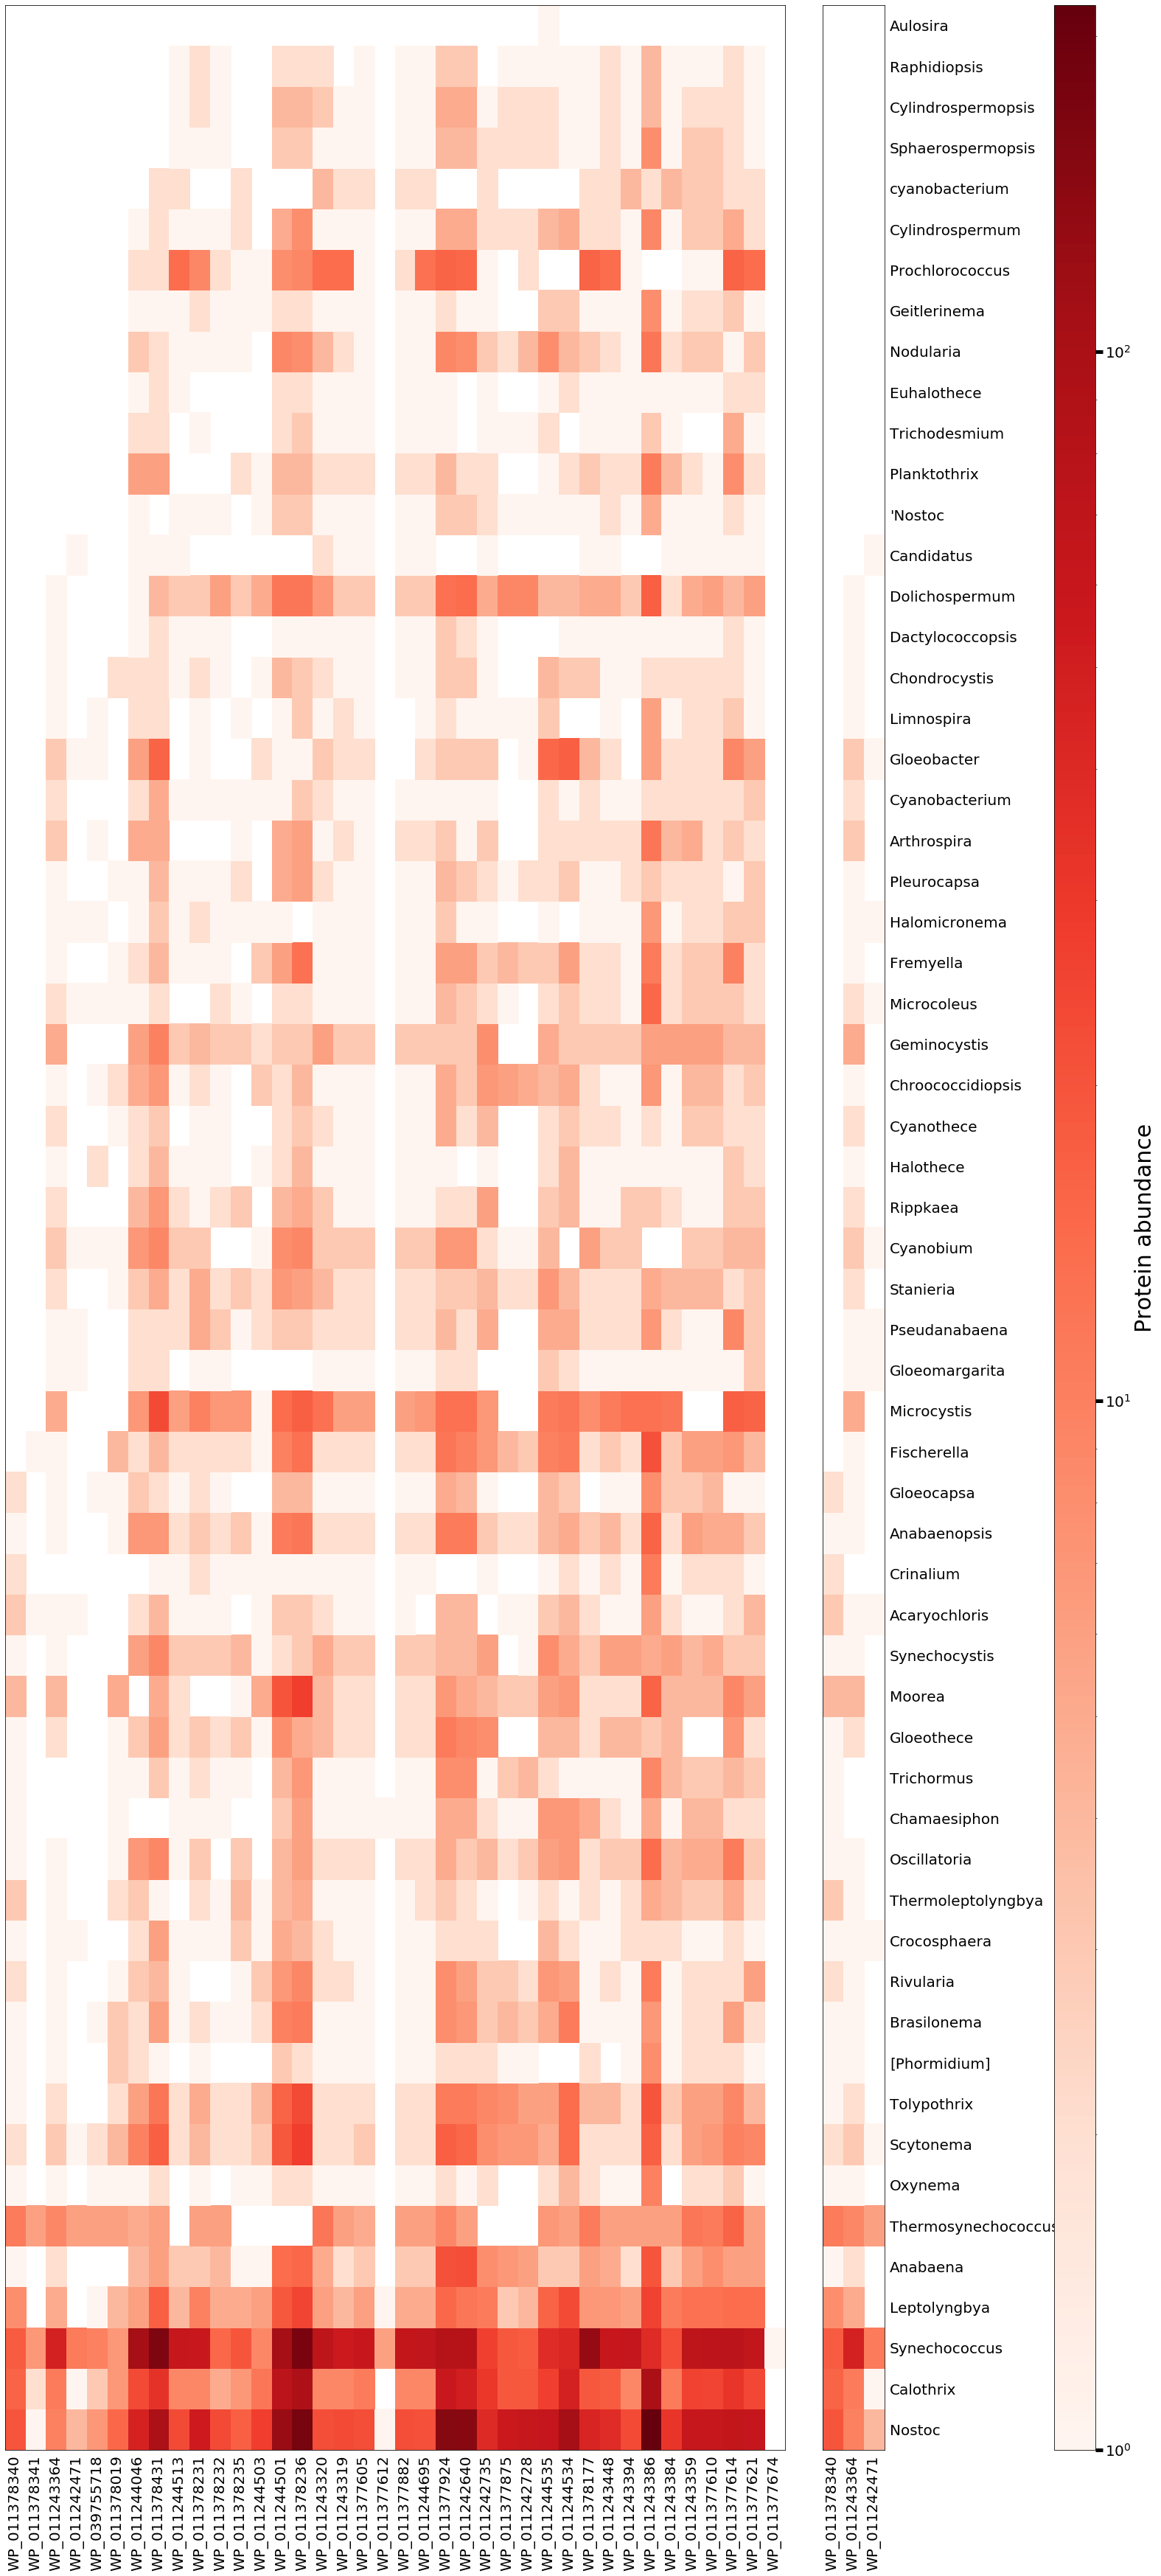

In [124]:
create_heatmap_from_list(listofframes, saving= 'multipleheatmaps.pdf')

In [105]:
sumheight

122

In [121]:
frame.max().max()

214.0